In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns;sns.set()
import datetime as dt

In [76]:
#uploaded the scraped from the python webscraping code 
a = pd.read_csv('All.csv')

In [77]:
#created a Column for years in the dataframe
a['Year']= a['Date'].apply(lambda year:year[-4:])

Text(0.5,0,'Years')

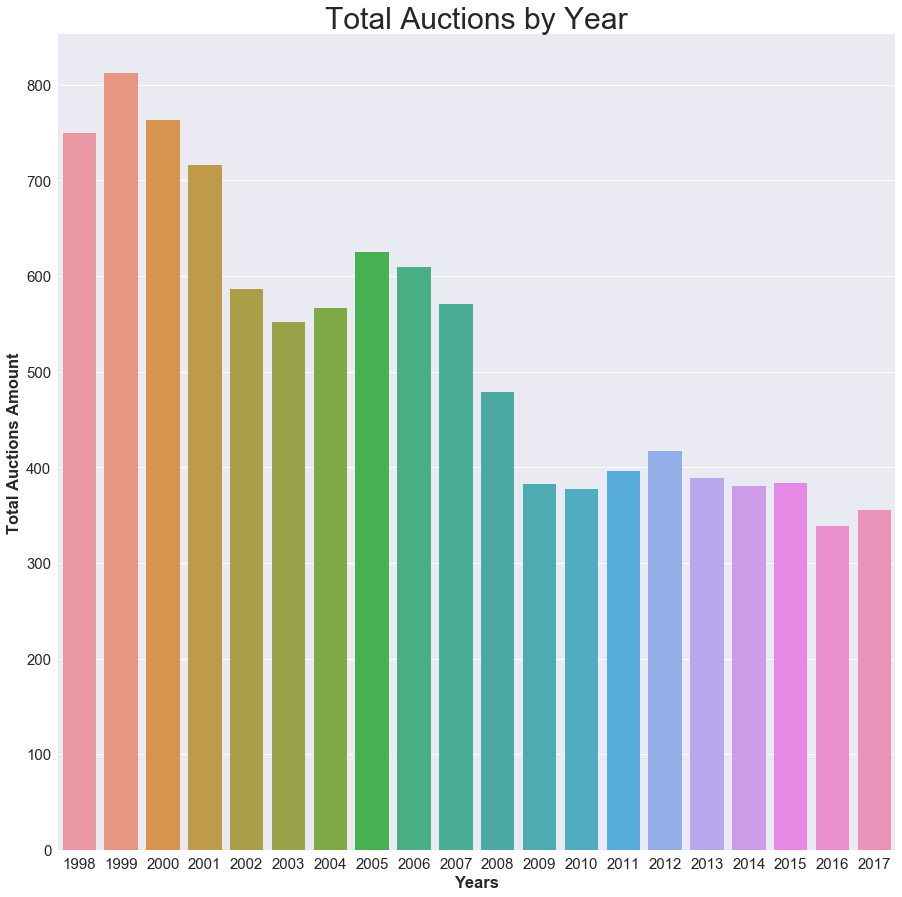

In [78]:
#Graph Total Auctions by Year

sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,15))
year_count = sns.countplot(a['Year'],data=a)
year_count.set_title('Total Auctions by Year',fontsize=30)
plt.ylabel('Total Auctions Amount',fontweight='bold')
plt.xlabel('Years',fontweight='bold')

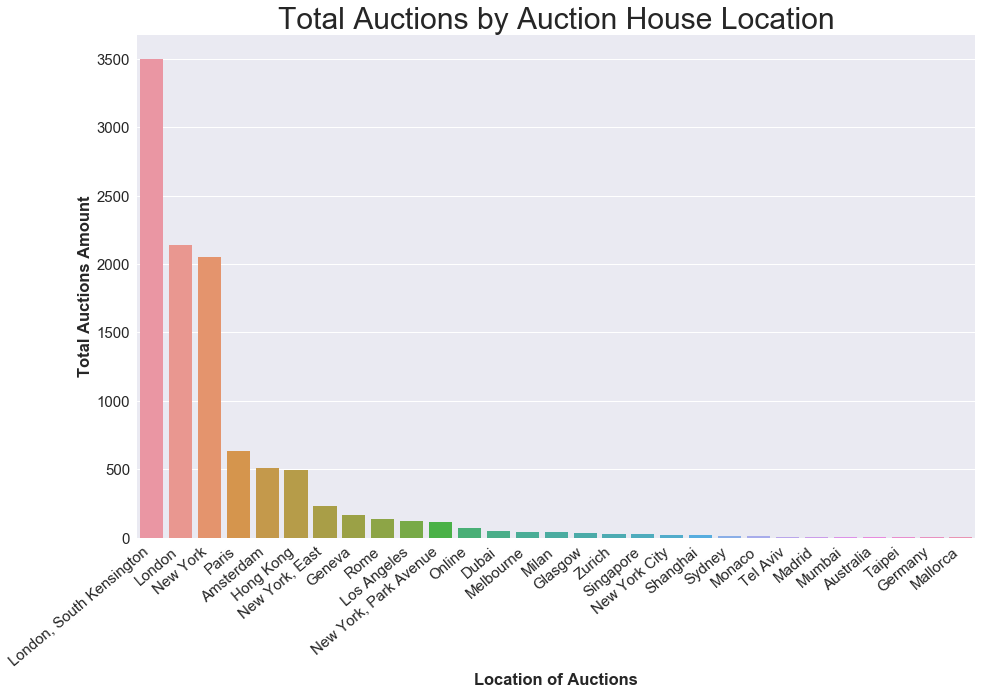

In [79]:
#Graph for Total Auctions by Auction House Location

plt.figure(figsize=(14,10))
location = sns.countplot(a['Location'],data=a,order=a['Location'].value_counts().index)
location.set_title('Total Auctions by Auction House Location',fontsize=30)
location.set_xticklabels(location.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('Total Auctions Amount',fontweight='bold')
plt.xlabel('Location of Auctions',fontweight='bold')
plt.tight_layout()

In [80]:
#Here I was cleaning the Sold Price Column which as an object type into a float type
#so I was able to convert it to a USD column for the Total Sold price of each auction house 

a['Currency']= a['Prices'].apply(lambda year:year[:3])
a['Org_Amount']= a['Prices'].apply(lambda year:year[3:])
a['str_amount'] =[x.strip().replace(',',' ') for x in a['Org_Amount']]
a['Float Currency']=[x.strip().replace(' ','') for x in a['str_amount']]
a['Float Currency'] = a['Float Currency'].astype(float)
def list(a):
    if a['Currency']=='USD':
        return float(1)
    if a['Currency']=='GBP':
        return float(1.27495)
    if a['Currency']=='EUR':
        return float(1.14483)
    if a['Currency']=='HKD':
        return float(0.127388)
    if a['Currency']=='CHF':
        return float(1.00419)
    if a['Currency']=='NLG':
        return float(0.519502)
    if a['Currency']=='ITL':
        return float(0.000591256)
    if a['Currency']=='AUD':
        return float(0.731864)
    if a['Currency']=='SGD':
        return float(0.729364)
    if a['Currency']=='CNY':
        return float(0.145466)
    if a['Currency']=='FRF':
        return float(0.174520)
    if a['Currency']=='INR':
        return float(0.0143134)
    if a['Currency']=='TWD':
        return float(0.0325119)
    if a['Currency']=='DEM':
        return float(0.585335)
    if a['Currency']=='ESP':
        return float(0.00688048)
a['Conversions']= a.apply(lambda a: list(a),axis=1)
a['USA'] = a["Float Currency"].multiply(a["Conversions"], axis="index").astype(int)

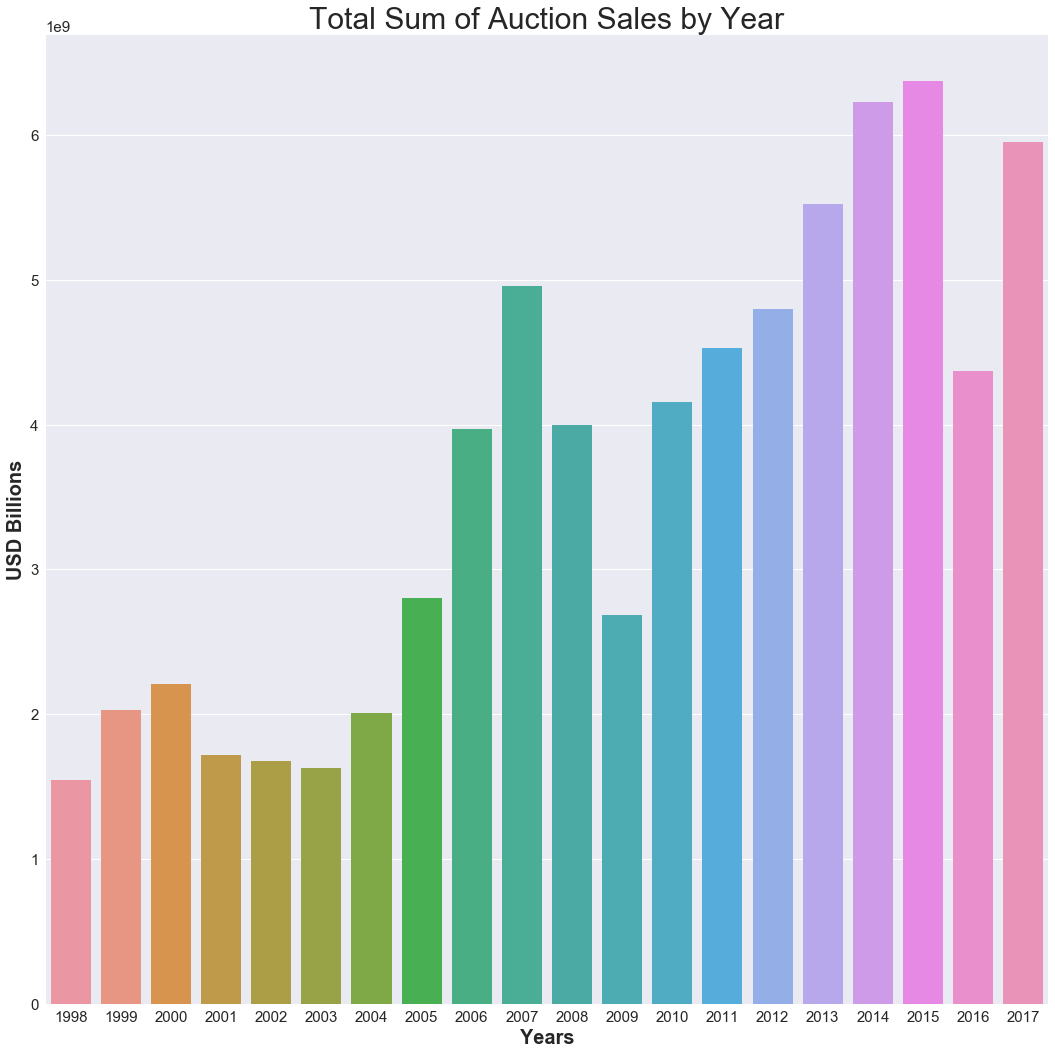

In [81]:
#Graph for Total Sum of Auction Sales by Year

year_sum = a.groupby(['Year'])['USA'].sum()

plt.figure(figsize=(15,15))
year = sns.barplot(x=year_sum.index.tolist(), y=year_sum.tolist(),data=a)
year.set_title('Total Sum of Auction Sales by Year',fontsize=30)
year.set_xticklabels(year.get_xticklabels())
plt.ylabel('USD Billions',fontweight='bold',fontsize=20)
plt.xlabel('Years',fontweight='bold',fontsize=20)
plt.tight_layout()

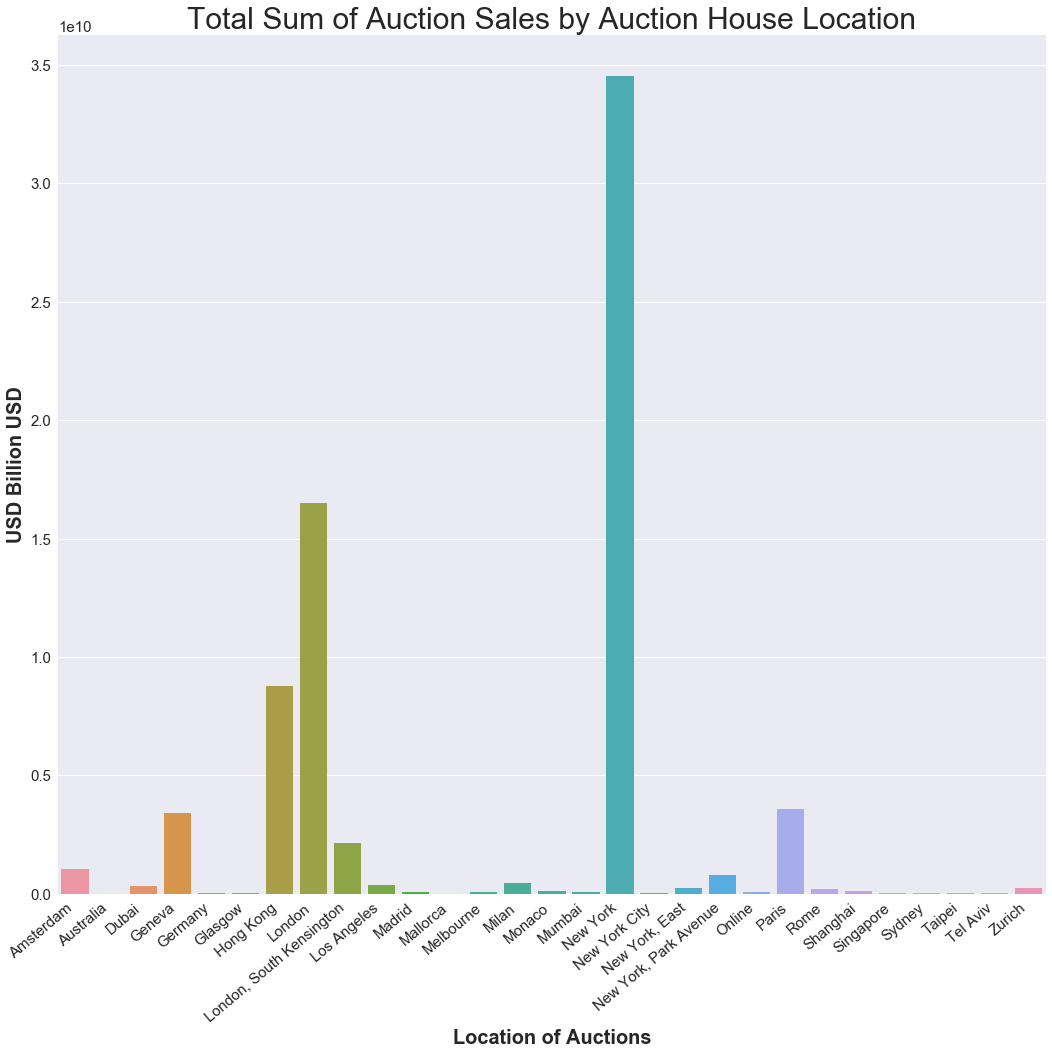

In [82]:
#Graph for Total Sum of Auction Sales by Auction House Location

sum = a.groupby(['Location'])['USA'].sum()

plt.figure(figsize=(15,15))
location = sns.barplot(x=sum.index.tolist(), y=sum.tolist(),data=a)
location.set_title('Total Sum of Auction Sales by Auction House Location',fontsize=30)
location.set_xticklabels(location.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('USD Billion USD',fontweight='bold',fontsize=20)
plt.xlabel('Location of Auctions',fontweight='bold',fontsize=20)
plt.tight_layout()

In [84]:
#Here I am filling-in all the Null values caused from the Selenium deeper scrape and combing through to make sure they have
#the proper count(This should be done repeatedly)
b = pd.read_csv('Fill_Complete.csv')
f = pd.read_csv('fill_in.csv')
f = f.set_index(['Link'])
b = b.set_index(['Link'])

b['Item Sold'].fillna(f['Item Sold'], inplace=True)
b['Link']= b.index
new_columns = b.columns.values
new_columns[0] = 'Count'
b.columns = new_columns
b = b.set_index(['Count'])

b.to_csv('Fill_Complete.csv', index=True, header=True)

In [85]:
#Cleaning up the Dataframe to Add the additional column obtained from the Selenium Scrape
a = a.drop(columns=['Org_Amount', 'str_amount','Float Currency'])
b = pd.read_csv('Fill_Complete.csv')
a['Pieces Sold'] = b['Item Sold']

Text(0,0.5,'')

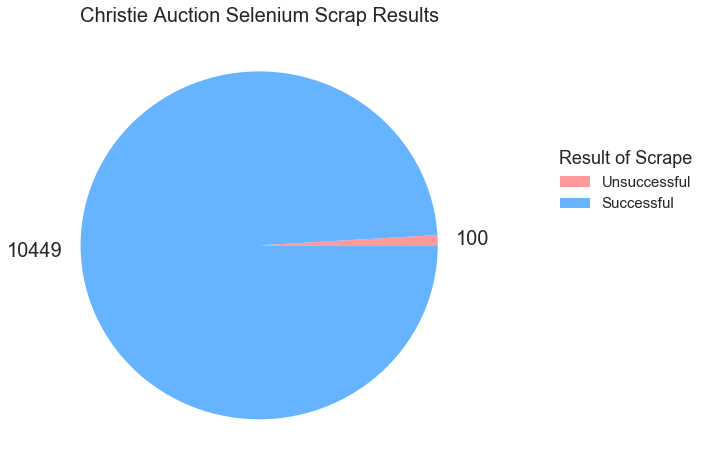

In [207]:
#Graph of the Amount of unsuccessful and successful auction links scraped by Selenium Code 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
Null = a['Pieces Sold'].isnull().sum()
Normal = a['Pieces Sold'].notnull().count()
nulls = pd.DataFrame([Null,Normal], index=['Null', 'Normal'], columns=['Amount'])
nulls['Amount'].plot(kind='pie', subplots=False, figsize=(8, 8), fontsize=20,labels=[null,normal],colors=colors)
plt.title('Christie Auction Selenium Scrap Results',fontsize=20)
plt.legend(title='Result of Scrape',labels=['Unsuccessful','Successful'] ,bbox_to_anchor=(1.5, 0.75))
plt.ylabel('',fontweight='bold',fontsize=20)

In [184]:
#Removing the unsuccessful scraped links to make graph visulizations to understand which  
c = a.dropna()
c['Pieces Sold'] = [x.strip().replace(',','') for x in c['Pieces Sold']]
c['Pieces Sold'] = c['Pieces Sold'].astype(int)

C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


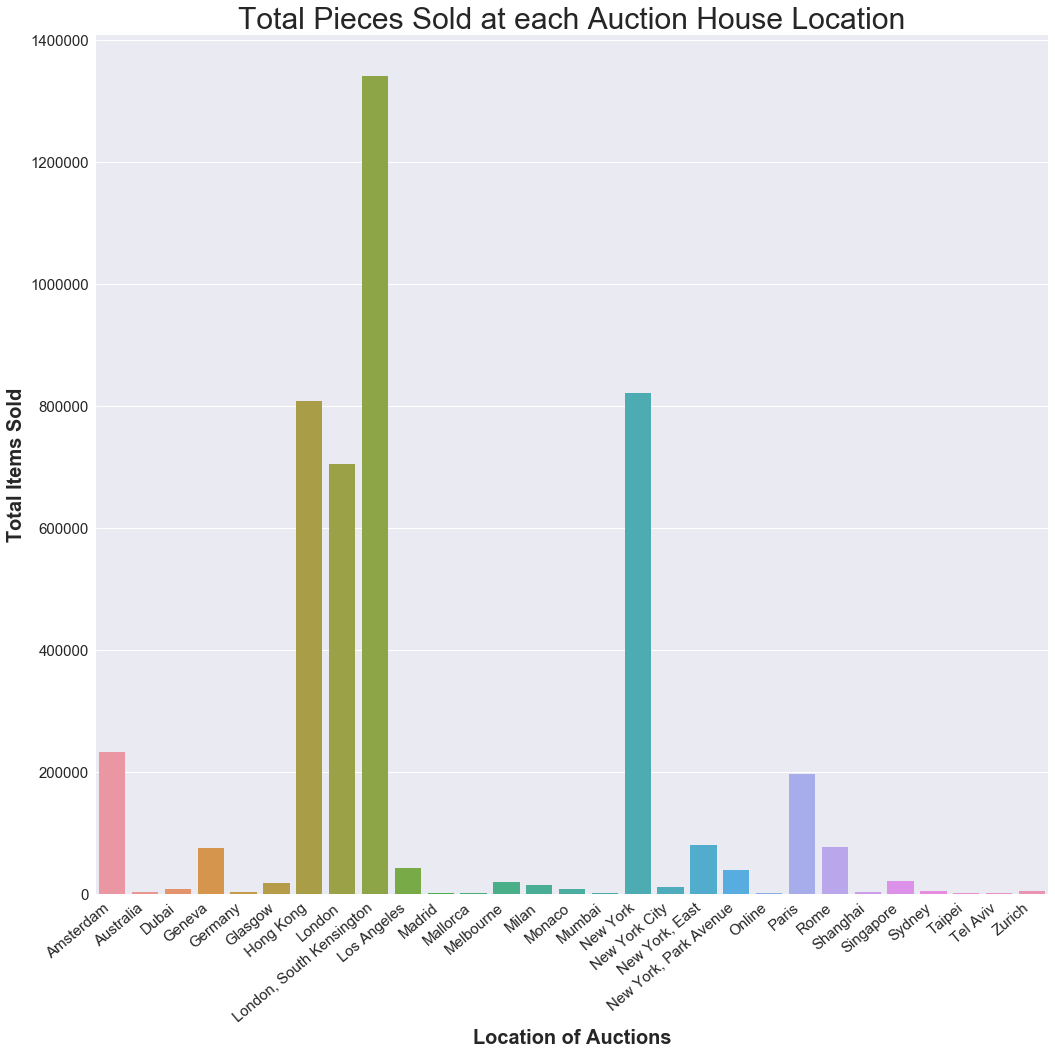

In [199]:
sum = c.groupby(['Location'])['Pieces Sold'].sum()

plt.figure(figsize=(15,15))
location = sns.barplot(x=sum.index.tolist(), y=sum.tolist(),data=a)
location.set_title('Total Pieces Sold at each Auction House Location',fontsize=30)
location.set_xticklabels(location.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('Total Items Sold',fontweight='bold',fontsize=20)
plt.xlabel('Location of Auctions',fontweight='bold',fontsize=20)
plt.tight_layout()

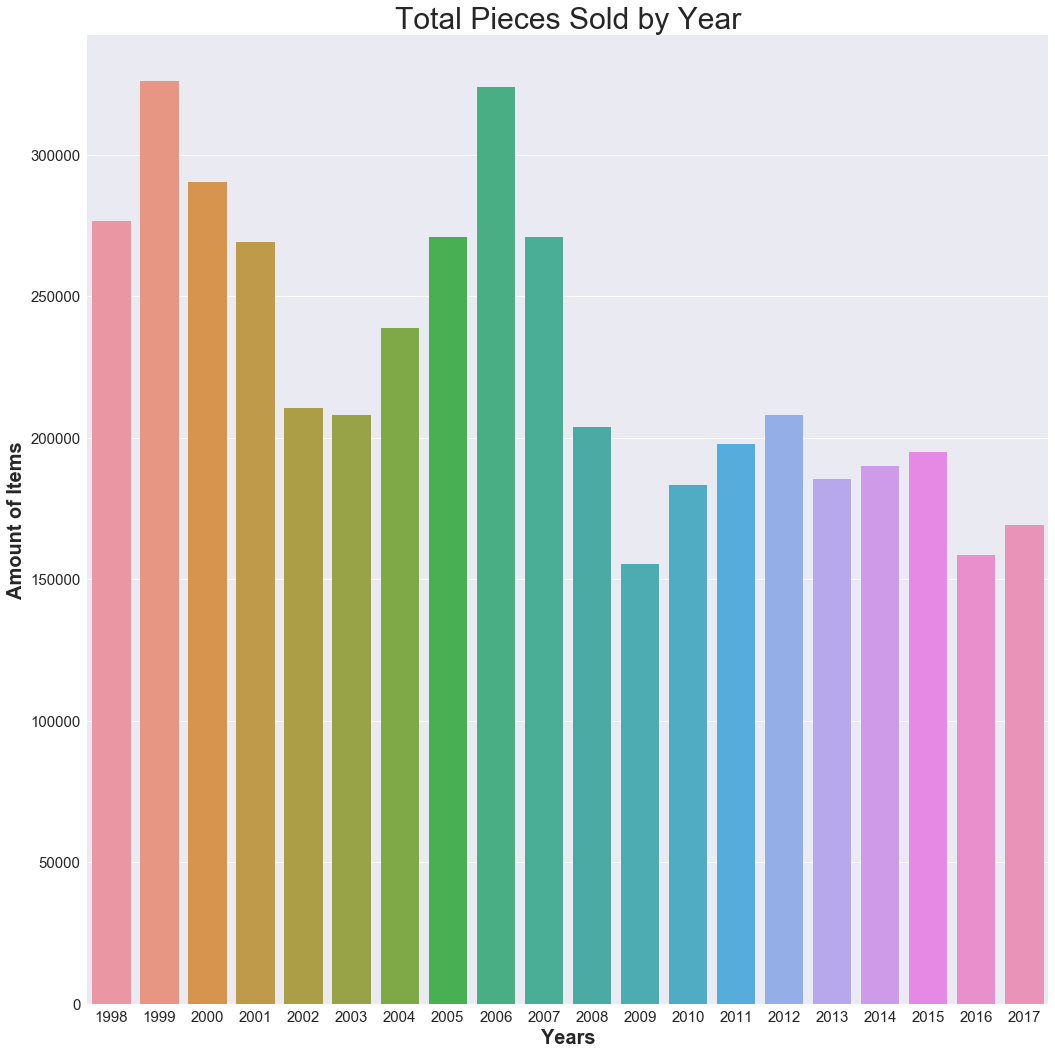

In [198]:
#Graph for Total Pieces Sum of Auction Sales by Year

year_sum = c.groupby(['Year'])['Pieces Sold'].sum()

plt.figure(figsize=(15,15))
year = sns.barplot(x=year_sum.index.tolist(), y=year_sum.tolist(),data=a)
year.set_title('Total Pieces Sold by Year',fontsize=30)
year.set_xticklabels(year.get_xticklabels())
plt.ylabel('Amount of Items',fontweight='bold',fontsize=20)
plt.xlabel('Years',fontweight='bold',fontsize=20)
plt.tight_layout()